**IMPORTANDO BIBLIOTECAS**

In [17]:
#Bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

#Classes do modelo de aprendizado
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.linear_model import Perceptron

from sklearn.preprocessing import MinMaxScaler

#Funções de avaliação dos modelos
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve, accuracy_score
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, StratifiedKFold, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

**ANÁLISE DO CONJUNTO DE DADOS**

In [2]:
#Carregando o dataset
df = pd.read_csv('https://raw.githubusercontent.com/albanoxdz/UFPE_ModPD/main/music_genre.csv')
#dataset = df.query('music_genre == "Hip-Hop" | music_genre == "Classical" | music_genre == "Anime"')
#dataset = df.query('music_genre == "Jazz" | music_genre == "Classical" | music_genre == "Rock"') | music_genre == "Classical"
dataset = df.query('music_genre == "Anime" | music_genre == "Hip-Hop" | music_genre == "Rock"')
#dataset = df
#Selecionar colunas
dataset_norm = dataset[['popularity','danceability']].copy()
dataset_norm

,popularity,danceability
5000,11.0,0.362
5001,26.0,0.627
5002,29.0,0.643
5003,18.0,0.585
5004,50.0,0.567
...,...,...
50000,59.0,0.913
50001,72.0,0.709
50002,51.0,0.693
50003,65.0,0.782


In [3]:
print("Quantas classes existem nesse dataset?\n%d" %(len(dataset["music_genre"].unique())))
print("\nQuantas instâncias existem no dataset?\n%d" %(len(dataset)))
print("\nQuantas features existem no dataset?\n%d" %(dataset.shape[1]))
print("\nQue features são essas?\n%s" %(str([k for k in dataset.keys()])))
print("\nQual o numero de instâncias por classe?")
print(dataset["music_genre"].value_counts())

Quantas classes existem nesse dataset?
3

Quantas instâncias existem no dataset?
15000

Quantas features existem no dataset?
18

Que features são essas?
['instance_id', 'artist_name', 'track_name', 'popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'obtained_date', 'valence', 'music_genre']

Qual o numero de instâncias por classe?
Anime      5000
Rock       5000
Hip-Hop    5000
Name: music_genre, dtype: int64


In [ ]:
dataset

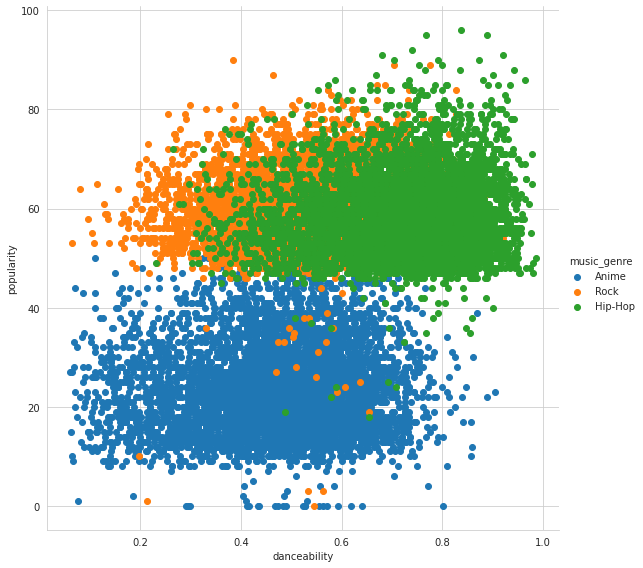

In [4]:
# Distribuição das classes pelas features SepalLengthCm e SepalWidthCm
sns.set_style("whitegrid")
sns.FacetGrid(dataset, hue ="music_genre",
              height = 8).map(plt.scatter,
                              'danceability',
                              'popularity').add_legend()

In [5]:
# Mapeando os valores da classe para inteiro (para fins de visualização da região de decisão)
dataset['music_genre'] = pd.factorize(dataset['music_genre'])[0]
dataset

# 0 - Anime
# 1 - Rock
# 2 - Hip-Hop

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
5000,36281.0,Capcom Sound Team,終幕組曲【冒險の終わり】,11.0,0.01540,0.362,429560.0,0.456,0.024100,D,0.2580,-11.355,Minor,0.0376,117.634,4-Apr,0.332,0
5001,78964.0,ayaka,そこまで歩いていくよ,26.0,0.82000,0.627,-1.0,0.350,0.000000,G,0.1250,-7.951,Major,0.0291,135.937,4-Apr,0.173,0
5002,31517.0,Hachioji P,KiLLER LADY - Eight Mix,29.0,0.00857,0.643,234874.0,0.966,0.003310,A#,0.2550,-3.902,Minor,0.0442,131.982,4-Apr,0.912,0
5003,29349.0,LiSA,Bad Sweet Trap,18.0,0.00711,0.585,229147.0,0.991,0.000002,F,0.1100,-2.817,Minor,0.1170,?,4-Apr,0.580,0
5004,84837.0,Hiroyuki Sawano,Call Your Name,50.0,0.01450,0.567,268333.0,0.300,0.000000,B,0.0687,-8.421,Minor,0.0291,141.819,4-Apr,0.196,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.000000,C#,0.1190,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,2
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.000000,B,0.1090,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,2
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.000000,D,0.1430,-5.443,Major,0.1460,131.079,4-Apr,0.395,2
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.000000,G,0.1060,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,2


**SEPARANDO O CONJUNTO DE DADOS**

In [6]:
#Vamos usar somente duas features SepalLengthCm e SepalWidthCm
X = dataset.iloc[:,[3,5]]
y = dataset.iloc[:,[17]]

print(X.values)
print(y.values)

#Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

[[11.     0.362]
 [26.     0.627]
 [29.     0.643]
 ...
 [51.     0.693]
 [65.     0.782]
 [67.     0.862]]
[[0]
 [0]
 [0]
 ...
 [2]
 [2]
 [2]]


GRID SEARCH

In [25]:
#Separando os Folds para serem utilizados em todos os modelos
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

# apply the maximum absolute scaling in Pandas using the .abs() and .max() methods
def maximum_absolute_scaling(df):
    # copy the dataframe
    df_scaled = df.copy()
    # apply maximum absolute scaling
    for column in df_scaled.columns:
        df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max()
    return df_scaled

def grid_Search(skf,model,parameters):
  accuracies_list = []
  fold = 0

  for train, test in skf.split(X, y):
        X_train, X_test = X.iloc[train], X.iloc[test]
        y_train, y_test = y.iloc[train], y.iloc[test]

        grid = GridSearchCV(estimator = model,             # É o DecisionTree
                    param_grid = parameters,           # É aquele dicionário com valores para serem testados.
                    scoring = 'accuracy',              # A métrica de avaliação
                    cv = 5)
        
        grid.fit(X_train, y_train)

        y_pred = grid.predict(X_test)
    
        print("Melhor parametro:", grid.best_params_)         
        print("Fold %d: %.3f" %(fold, accuracy_score(y_test, y_pred)))
        
        accuracies_list.append(accuracy_score(y_test, y_pred))
        fold += 1
    
  accuracies = np.array(accuracies_list)
  print("\nAcurácia média (desvio): %.3f +- (%.3f)" %(accuracies.mean(), accuracies.std()))
  return pd.DataFrame(grid.cv_results_)

df_scaled = maximum_absolute_scaling(dataset_norm)
#print(df_scaled)

In [26]:
#GRID SEARCH PARA KNN
model = KNeighborsClassifier()
parameters = {'n_neighbors': [5, 10],
                'weights':["uniform", "distance"]
                }
grid_Search(skf,model,parameters)

Melhor parametro: {'n_neighbors': 10, 'weights': 'uniform'}
Fold 0: 0.819
Melhor parametro: {'n_neighbors': 10, 'weights': 'uniform'}
Fold 1: 0.834
Melhor parametro: {'n_neighbors': 10, 'weights': 'uniform'}
Fold 2: 0.817
Melhor parametro: {'n_neighbors': 10, 'weights': 'uniform'}
Fold 3: 0.825
Melhor parametro: {'n_neighbors': 10, 'weights': 'uniform'}
Fold 4: 0.827
Melhor parametro: {'n_neighbors': 10, 'weights': 'uniform'}
Fold 5: 0.811
Melhor parametro: {'n_neighbors': 10, 'weights': 'uniform'}
Fold 6: 0.837
Melhor parametro: {'n_neighbors': 10, 'weights': 'uniform'}
Fold 7: 0.818
Melhor parametro: {'n_neighbors': 10, 'weights': 'uniform'}
Fold 8: 0.811
Melhor parametro: {'n_neighbors': 10, 'weights': 'uniform'}
Fold 9: 0.803

Acurácia média (desvio): 0.820 +- (0.010)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013097,0.001875,0.137283,0.004778,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.816667,0.816667,0.822963,0.807037,0.810741,0.814815,0.005483,2
1,0.012337,0.000424,0.020341,0.000951,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.788889,0.785185,0.787407,0.788519,0.787407,0.787481,0.001292,4
2,0.012391,0.000561,0.136230,0.003102,10,uniform,"{'n_neighbors': 10, 'weights': 'uniform'}",0.824815,0.820741,0.831111,0.814074,0.825556,0.823259,0.005658,1
3,0.012414,0.000583,0.025157,0.001560,10,distance,"{'n_neighbors': 10, 'weights': 'distance'}",0.795556,0.789259,0.802593,0.788519,0.792963,0.793778,0.005091,3


In [37]:
#GRID SEARCH PARA DT
model = DecisionTreeClassifier(random_state=199)
parameters = {'min_samples_split': [10, 30],
                'max_depth':[5, 30],
                'max_features':[10, 30]
                }
grid_Search(skf,model,parameters)

ValueError: ignored

In [28]:
#GRID SEARCH PARA MLP
model = DecisionTreeClassifier(random_state=199)
parameters = {'min_samples_split': [10, 30],
                'max_depth':[5, 30],
                'max_features':[10, 30]
                }
grid_Search(skf,model,parameters)

ValueError: ignored

In [27]:
#GRID SEARCH PARA NB
#Parametros tem distribuição normal, desta forma foi avaliado apenas o NB Gaussiano
#https://stackoverflow.com/questions/39828535/how-to-tune-gaussiannb
model = GaussianNB()
parameters = {'min_samples_split': [10, 30],
                'max_depth':[5, 30],
                'max_features':[10, 30]
                }
grid_Search(skf,model,parameters)

ValueError: ignored

In [ ]:
#GRID SEARCH PARA SVM
model = SVC()
#C 
# kernel - 
parameters = {'C':[100, 1000, 10000, 100000],
                'kernel': ['linear', 'rbf']}
grid_Search(skf,model,parameters)

**AVALIANDO MODELO**

In [38]:
def show_decision_region(x, y, clf):
    plot_decision_regions(x, y, clf=clf)
    plt.xlabel("popularity")
    plt.ylabel("danceability")

    plt.title(clf.__class__.__name__)
    plt.show()

def evaluate_model(kf, model, classifier_name):
    accuracies_list = []
    fold = 0
    for train, test in kf.split(X, y):
        
        X_train, X_test = X.iloc[train], X.iloc[test]
        y_train, y_test = y.iloc[train], y.iloc[test]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        print("Fold %d" %(fold))
        print(classifier_name)
        print("accuracy_score: %.3f" %(accuracy_score(y_test, y_pred)))

        #show_decision_region(np.array([X_test["popularity"].values, X_test["danceability"].values]).T, y_test.values.reshape(-1,1).T[0], model)
        plot_roc_curve(model, X_test, y_test)
        #plot_confusion_matrix(model, X_test, y_test)

        #Resultados do classificador
        print(classification_report(y_test, y_pred))
        accuracies_list.append(accuracy_score(y_test, y_pred))
        fold += 1

    accuracies = np.array(accuracies_list)
    print("\nAcurácia média (desvio): %.3f +- (%.3f)" %(accuracies.mean(), accuracies.std()))


In [39]:
#KNeighborsClassifier()
#Separando os Folds para serem utilizados em todos os modelos
skf = StratifiedKFold(n_splits=2, random_state=10, shuffle=True)

model = KNeighborsClassifier()
classifier_name = "KNeighborsClassifier"
evaluate_model(skf, model, classifier_name)

Fold 0
KNeighborsClassifier
accuracy_score: 0.811


ValueError: ignored

In [18]:
names = ["KNeighborsClassifier", "DecisionTreeClassifier", "MLPClassifier", "GaussianNB"]

classifiers = [
                  KNeighborsClassifier(),
                  DecisionTreeClassifier(),
                  MLPClassifier(),
                  GaussianNB()
      
                 ]

#KNeighborsClassifier()
model = KNeighborsClassifier()
classifier_name = "KNeighborsClassifier"
evaluate_model(KFold(n_splits=10, random_state=10, shuffle=True), model, classifier_name)

#DecisionTreeClassifier()
model = DecisionTreeClassifier()
classifier_name = "DecisionTreeClassifier"
evaluate_model(KFold(n_splits=10, random_state=10, shuffle=True), model, classifier_name)

#Perceptron()
model = Perceptron()
classifier_name = "Perceptron"
evaluate_model(KFold(n_splits=10, random_state=10, shuffle=True), model, classifier_name)

#MLPClassifier()
model = MLPClassifier()
classifier_name = "MLPClassifier"
evaluate_model(KFold(n_splits=10, random_state=10, shuffle=True), model, classifier_name)

#GaussianNB()
model = GaussianNB()
classifier_name = "GaussianNB"
evaluate_model(KFold(n_splits=10, random_state=10, shuffle=True), model, classifier_name)

#SVC()
model = SVC(kernel="linear")
classifier_name = "SVC"
evaluate_model(KFold(n_splits=10, random_state=10, shuffle=True), model, classifier_name)




Fold 0
KNeighborsClassifier
accuracy_score: 0.806
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       475
           1       0.71      0.77      0.74       522
           2       0.75      0.69      0.72       503

    accuracy                           0.81      1500
   macro avg       0.81      0.81      0.81      1500
weighted avg       0.81      0.81      0.81      1500

Fold 1
KNeighborsClassifier
accuracy_score: 0.827
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       511
           1       0.74      0.75      0.75       493
           2       0.75      0.74      0.74       496

    accuracy                           0.83      1500
   macro avg       0.83      0.82      0.83      1500
weighted avg       0.83      0.83      0.83      1500

Fold 2
KNeighborsClassifier
accuracy_score: 0.801
              precision    recall  f1-score   support

           0       0.96      0.98

**TREINAMENTO DO MODELO**

**AVALIANDO DECISION TREE**

Fold 0: 0.753
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       475
           1       0.65      0.71      0.68       522
           2       0.67      0.60      0.63       503

    accuracy                           0.75      1500
   macro avg       0.76      0.76      0.76      1500
weighted avg       0.75      0.75      0.75      1500

Fold 1: 0.779
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       511
           1       0.68      0.70      0.69       493
           2       0.69      0.65      0.67       496

    accuracy                           0.78      1500
   macro avg       0.78      0.78      0.78      1500
weighted avg       0.78      0.78      0.78      1500

Fold 2: 0.771
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       496
           1       0.68      0.70      0.69       523
           2       0.67      0.65

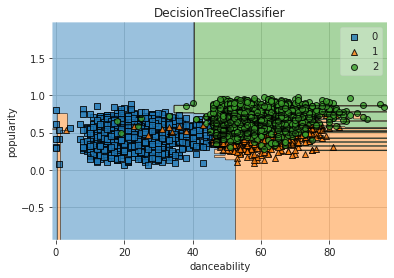

In [ ]:
def evaluate_model(kf):
    accuracies_list = []
    fold = 0
    for train, test in kf.split(X, y):
        
        X_train, X_test = X.iloc[train], X.iloc[test]
        y_train, y_test = y.iloc[train], y.iloc[test]

        model = DecisionTreeClassifier()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        print("Fold %d: %.3f" %(fold, accuracy_score(y_test, y_pred)))

        #plot_roc_curve(model, X_test, y_test)
        #plot_confusion_matrix(model, X_test, y_test)

        #Resultados do classificador
        print(classification_report(y_test, y_pred))
        #accuracies_list.append(accuracy_score(y_test, y_pred))
        fold += 1

    accuracies = np.array(accuracies_list)
    print("\nAcurácia média (desvio): %.3f +- (%.3f)" %(accuracies.mean(), accuracies.std()))
    

#confirmar se random state altera o pacote a ser testado em cada fold
evaluate_model(KFold(n_splits=10, random_state=10, shuffle=True))

def show_decision_region(x, y, clf):
    plot_decision_regions(x, y, clf=clf)
    plt.xlabel("popularity")
    plt.ylabel("danceability")

    plt.title(clf.__class__.__name__)
    plt.show()

show_decision_region(np.array([X_test["popularity"].values, X_test["danceability"].values]).T, y_test.values.reshape(-1,1).T[0], model)

**Métricas**

*   **Precision** - $\frac{tp}{(tp + fp)}$
*   **Recall** - $\frac{tp}{(tp + fn)}$ 
*   **F1-score** - $2 * \frac{(precision * recall)}{(precision + recall)}$
*   **Accuracy** - $\frac{C}{T}$
*   **Macro avg** - Calcule as métricas para cada rótulo e encontre sua média não ponderada.
*   **Weighted avg** - Calcule as métricas para cada rótulo e encontre sua média ponderada pelo suporte (o número de instâncias verdadeiras para cada rótulo).

**tp** - verdadeiros positivos

**fp** - falsos positivos

**fn** - falsos negativos

**C** - Número de predições corretas

**T** - Número total de predições

**REGIÃO DE DECISÃO**

AttributeError: ignored

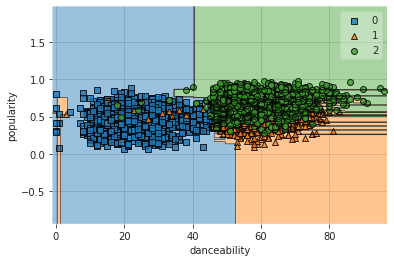

In [ ]:
#plot_decision_regions(np.array([X_test["popularity"].values, X_test["acousticness"].values, X_test["danceability"].values, X_test["energy"].values, X_test["instrumentalness"].values, X_test["liveness"].values, X_test["loudness"].values, X_test["speechiness"].values, X_test["valence"].values]).T, y_test.values.reshape(-1,1).T[0], model)
#plot_decision_regions(np.array([X_test["popularity"].values, X_test["acousticness"].values], X_test["danceability"].values], X_test["energy"].values], X_test["instrumentalness"].values], X_test["liveness"].values]]).T, y_test.values.reshape(-1,1).T[0], model)
#, X_test["loudness"].values], X_test["speechiness"].values], X_test["valence"].values]
plot_decision_regions(np.array([X_test["popularity"].values, X_test["danceability"].values]).T, y_test.values.reshape(-1,1).T[0], model)
plt.xlabel("danceability")
plt.ylabel("popularity")

plt.title(model.__class__.__name__ + " k = " + str(model.n_neighbors))
plt.show()

**VARIANDO O TAMANHO DA VIZINHANÇA**

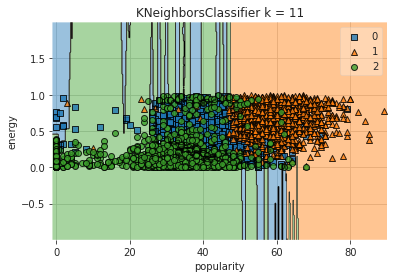

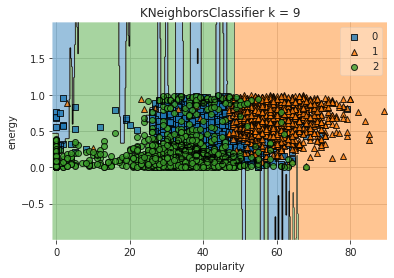

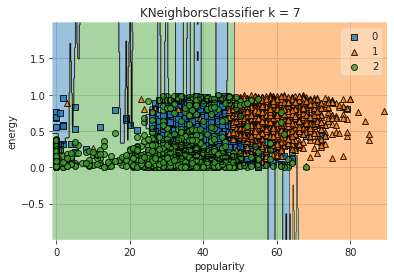

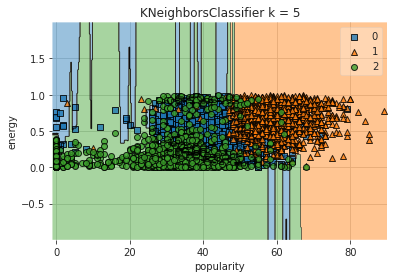

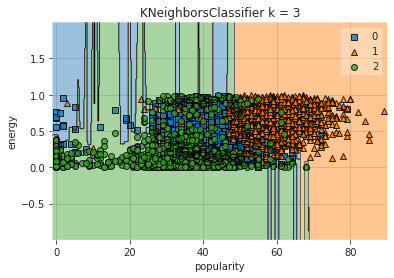

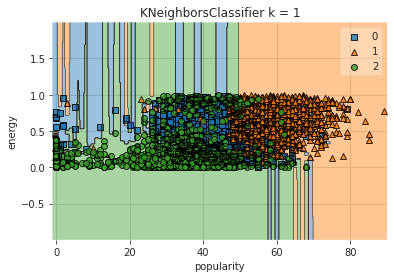

In [ ]:
for k in [11, 9, 7, 5, 3, 1]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    plot_decision_regions(np.array([X_test["popularity"].values, X_test["energy"].values]).T, y_test.values.reshape(-1,1).T[0], model)
    plt.xlabel("popularity")
    plt.ylabel("energy")

    plt.title(model.__class__.__name__ + " k = " + str(model.n_neighbors))
    plt.show()

**MEDIDA DE DISTÂNCIA**

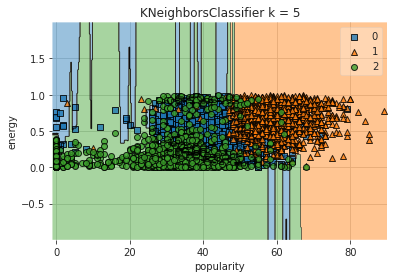

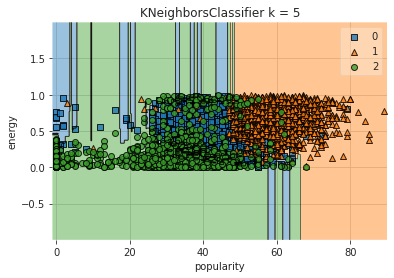

In [ ]:
for m in ["euclidean", "manhattan"]:
    model = KNeighborsClassifier(metric=m)
    model.fit(X_train, y_train)

    plot_decision_regions(np.array([X_test["popularity"].values, X_test["energy"].values]).T, y_test.values.reshape(-1,1).T[0], model)
    plt.xlabel("popularity")
    plt.ylabel("energy")

    plt.title(model.__class__.__name__ + " k = " + str(model.n_neighbors))
    plt.show()